# APEX Gun: Bmad

In [1]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytao import Tao

from pmd_beamphysics import ParticleGroup, single_particle

import os

## Single particle

In [3]:
?single_particle

Signature:
single_particle(
    x=0,
    px=0,
    y=0,
    py=0,
    z=0,
    pz=0,
    t=0,
    weight=1,
    status=1,
    species='electron',
)
Docstring:
Convenience function to make ParticleGroup with a single particle.

Units:
    x, y, z: m
    px, py, pz: eV/c
    t: s
    weight: C
    status=1 => live particle
    
File:      /nfs/user/nw285/packages/miniconda3/envs/bmad-benchmarking/lib/python3.9/site-packages/pmd_beamphysics/particles.py
Type:      function


In [4]:
P0 = single_particle(x=1000e-6, z=1e-9, pz=1e-9)
P0.data

{'x': array([0.001]),
 'px': array([0]),
 'y': array([0]),
 'py': array([0]),
 'z': array([1.e-09]),
 'pz': array([1.e-09]),
 't': array([0]),
 'status': array([1]),
 'weight': array([1]),
 'species': 'electron'}

In [5]:
PFILE = 'initial_particles.h5'

In [6]:
P0.write(PFILE)

## Make markers 

The beam will be saved at these.

In [7]:
from pytao.misc.markers import make_markers

slist = np.linspace(0, 0.5, 50)
mlist = make_markers(slist, filename='markers.bmad')
mnames = [m.split(':')[0] for m in mlist]
mnames[0:3]

['m_000', 'm_001', 'm_002']

# Run Tao

In [8]:
tao = Tao(f'-init tao.init -noplot -beam_init_position_file {PFILE}')

In [9]:
%%tao
set ele GUN VOLTAGE = 750e3
set ele SOL1 BS_FIELD = 0

-------------------------
Tao> set ele GUN VOLTAGE = 750e3
-------------------------
Tao> set ele SOL1 BS_FIELD = 0
-------------------------
Tao> 


In [10]:
# Toggle beam
tao.cmd('set global track_type = beam;set global track_type = single')

['',
 'Tao: set global track_type = beam',
 '',
 'Tao: set global track_type = single']

In [11]:
Plist = [ParticleGroup(data=tao.bunch_data(name)) for name in mnames]

Plist[-1][0].data

{'x': array([0.005955]),
 'px': array([12302.44347752]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0]),
 'pz': array([1152679.57707593]),
 't': array([1.88320286e-09]),
 'status': array([1], dtype=int32),
 'weight': array([1.]),
 'species': 'electron'}

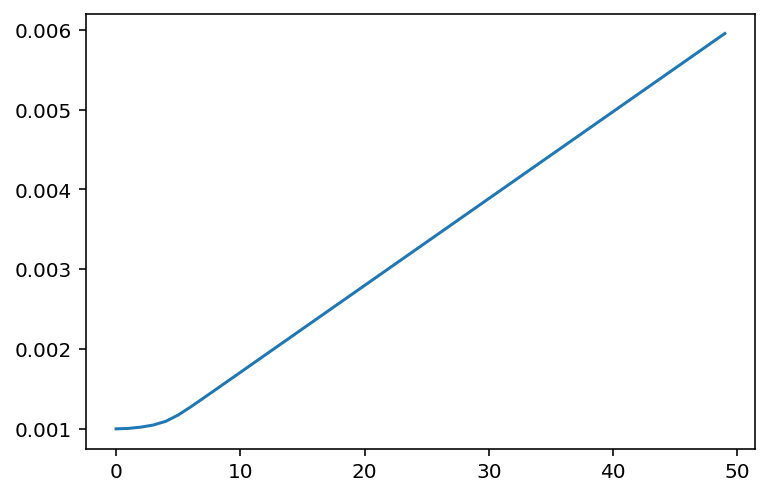

In [12]:

# Extract some data
x = [P.x for P in Plist]

plt.plot(x)

In [13]:
%%tao
sho ele GUN

-------------------------
Tao> sho ele GUN
Element # 104
Element Name: GUN
Key: E_Gun
S_start, S:      0.000000,      0.175000
Ref_time:  6.973132E-10

Attribute values [Only non-zero values shown]:
    1  L                           =  1.7500000E-01 m
    3  RF_FREQUENCY                =  1.8571429E+08 Hz
    7  GRADIENT_ERR                =  0.0000000E+00 eV/m
    8  VOLTAGE                     =  7.5000000E+05 Volt      6  GRADIENT                    =  4.2857143E+06 eV/m
    9  VOLTAGE_ERR                 =  0.0000000E+00 Volt
   10  FRINGE_TYPE                 =  Full (4)               11  FRINGE_AT                   =  Exit_End (2)
   13  SPIN_FRINGE_ON              =  T (1)
   17  STATIC_LINEAR_MAP           =  F (0)
   18  AUTOSCALE_AMPLITUDE         =  T (1)                  19  AUTOSCALE_PHASE             =  T (1)
   22  DT_MAX                      =  0.0000000E+00 sec
   23  EMIT_FRACTION               =  0.0000000E+00
   24  PHI0                        =  0.0000000E+00 rad/

In [14]:
# Cleanup
!rm beam_dump.h5
!rm initial_particles.h5
!rm *digested*